In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches


# set dataframe display limits
pd.set_option('display.max_rows', 50) #does not show 50?
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 200)

df = pd.read_csv('../data/_output.csv')

# reorder columns
columns = ['id', 'postalCode', 'province', 'locality', 'type of property', 'subtype of property', 'type of sale', 'state of the building', 'number of facades', 'number of bedrooms', 'fully equipped kitchen', 'furnished', 'open fire', 'terrace', 'garden', 'swimming pool', 'terrace area', 'garden area', 'living area', 'total property area', 'total land area', 'price']
df = df[columns]

# convert to desired type
    # for boolean:
        # contvert to string
        # with a lambda function, check if value is equal to 'True', 'true', or '1' and return True or False
        # convert to integer
df['id'] = df['id'].astype(int)
df['postalCode'] = df['postalCode'].astype(int)
df['province'] = df['province'].astype(str)
df['locality'] = df['locality'].astype(str)
df['type of property'] = df['type of property'].astype(str)
df['subtype of property'] = df['subtype of property'].astype(str)
df['type of sale'] = df['type of sale'].astype(str)
df['state of the building'] = df['state of the building'].astype(str)
df['number of facades'] = df['number of facades'].astype(int)
df['number of bedrooms'] = df['number of bedrooms'].astype(int)
df['fully equipped kitchen'] = df['fully equipped kitchen'].astype(str)
df['furnished'] = df['furnished'].astype(str).apply(lambda x: int(x.lower() == 'true' or x.lower() == '1'))
df['open fire'] = df['open fire'].astype(str).apply(lambda x: int(x.lower() == 'true' or x.lower() == '1'))
df['terrace'] = df['terrace'].astype(str).apply(lambda x: int(x.lower() == 'true' or x.lower() == '1'))
df['garden'] = df['garden'].astype(str).apply(lambda x: int(x.lower() == 'true' or x.lower() == '1'))
df['swimming pool'] = df['swimming pool'].astype(str).apply(lambda x: int(x.lower() == 'true' or x.lower() == '1'))
df['terrace area'] = df['terrace area'].astype(int)
df['garden area'] = df['garden area'].astype(int)
df['living area'] = df['living area'].astype(int)
df['total property area'] = df['total property area'].astype(int)
df['total land area'] = df['total land area'].astype(int)
df['price'] = df['price'].astype(int)

# drop duplicates
df = df.drop_duplicates()

for column in columns:
    # check if values are string
    if df[column].dtype == 'object':
         # remove leading and trailing spaces
        df[column] = df[column].str.strip()

# exclude rows where province is '0'
df = df[df['province'] != '0']

# exclude rows where total property area is '0'
df = df[df['total property area'] != 0]

# locate empty values
rows_with_missing_values = df.isna().any(axis=1)
count_rows_with_missing_values = rows_with_missing_values.sum()
print('Missing values: '+str(count_rows_with_missing_values))

#empty_values = df.isnull()
#empty_values_sum = empty_values.sum()
#print('empty values:\n'+str(empty_values_sum))



Missing values: 0


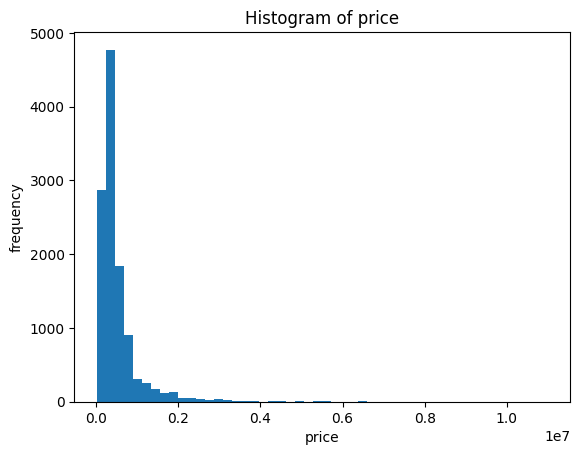

In [17]:
plt.hist(df['price'],bins=50)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Histogram of price')
plt.show()

In [18]:
# add provinces binary dummies to df
province_binary= pd.get_dummies(df['province']).astype(int)
df = pd.concat([df, province_binary], axis = 1)

# add subtype binary dummies to df
subtype_binary= pd.get_dummies(df['subtype of property']).astype(int)
df = pd.concat([df, subtype_binary], axis = 1)

# convert state of the building to binary
df['state of the building'] = np.where(df['state of the building'].isin(['just_renovated', 'as_new', 'good']), 1, 0)
    # =df['state of the building'].isin(['just_renovated', 'as_new', 'good']).astype(int)

In [19]:
df

,id,postalCode,province,locality,type of property,subtype of property,type of sale,state of the building,number of facades,number of bedrooms,fully equipped kitchen,furnished,open fire,terrace,garden,swimming pool,terrace area,garden area,living area,total property area,total land area,price,Antwerp,Brussels,East Flanders,Flemish Brabant,Hainaut,Limburg,Liège,Luxembourg,Namur,Walloon Brabant,West Flanders,APARTMENT,APARTMENT_BLOCK,BUNGALOW,CASTLE,CHALET,COUNTRY_COTTAGE,DUPLEX,EXCEPTIONAL_PROPERTY,FARMHOUSE,FLAT_STUDIO,GROUND_FLOOR,HOUSE,KOT,LOFT,MANOR_HOUSE,MANSION,MIXED_USE_BUILDING,OTHER_PROPERTY,PENTHOUSE,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA
0,10679324,4100,Liège,Seraing,HOUSE,HOUSE,residential_sale,1,2,3,installed,0,0,1,1,0,64,106,14,87,145,159000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,10679325,4600,Liège,Vise,HOUSE,HOUSE,residential_sale,1,3,3,installed,0,0,1,0,0,136,0,19,145,184,229000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,10679351,1800,Flemish Brabant,Vilvoorde,HOUSE,VILLA,residential_sale,1,3,3,semi_equipped,0,0,1,1,0,40,400,17,132,623,430000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,10679090,9700,East Flanders,Oudenaarde,HOUSE,HOUSE,residential_sale,1,4,2,hyper_equipped,0,0,1,1,0,25,420,21,161,680,439000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,10678835,1700,Flemish Brabant,Dilbeek,HOUSE,HOUSE,residential_sale,0,3,4,installed,0,0,1,0,0,0,0,29,315,8002,529000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,10619309,7500,Hainaut,Tournai,APARTMENT,APARTMENT,residential_sale,1,2,2,installed,0,0,0,1,0,0,80,0,97,0,129000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11990,10588563,4100,Liège,Seraing,APARTMENT,APARTMENT,residential_sale,0,2,2,semi_equipped,0,0,1,0,0,8,0,0,73,0,134000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11991,9812376,7080,Hainaut,Frameries,APARTMENT,APARTMENT,residential_sale,0,2,1,0,0,1,0,0,0,0,0,0,251,0,135000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11992,10273588,3770,Limburg,Riemst,APARTMENT,APARTMENT,residential_sale,1,3,1,0,0,0,1,0,0,0,0,0,58,0,139000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


0.4960985043806394


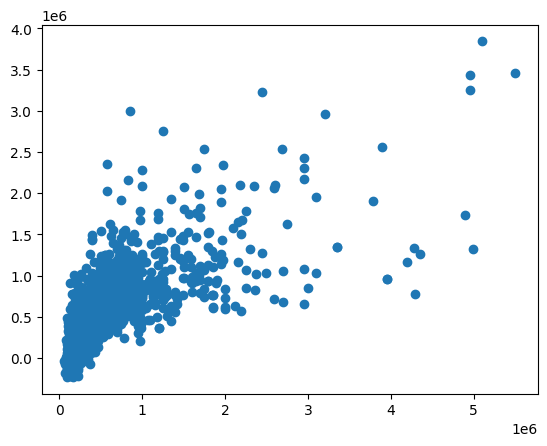

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features = ['total property area','state of the building','number of facades','number of bedrooms','Antwerp','Brussels','East Flanders','Flemish Brabant','Walloon Brabant','Hainaut','Limburg','Liège','Luxembourg','Namur','West Flanders','APARTMENT','APARTMENT_BLOCK','BUNGALOW','CASTLE','CHALET','COUNTRY_COTTAGE','DUPLEX','EXCEPTIONAL_PROPERTY','FARMHOUSE','FLAT_STUDIO','GROUND_FLOOR','HOUSE','KOT','LOFT','MANOR_HOUSE','MANSION','MIXED_USE_BUILDING','OTHER_PROPERTY','PENTHOUSE','SERVICE_FLAT','TOWN_HOUSE','TRIPLEX','VILLA','furnished','open fire','terrace','garden','swimming pool']
# make vector array
X = df[features].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # test_size==0.25 by default

# X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Plot prediction accuracy
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

print(regressor.score(X_test,y_test))

Epoch 1/100
234/234 [==============================] - 1s 2ms/step - loss: 592282910720.0000 - val_loss: 636543827968.0000
Epoch 2/100
234/234 [==============================] - 1s 2ms/step - loss: 590839808000.0000 - val_loss: 633453281280.0000
Epoch 3/100
234/234 [==============================] - 0s 2ms/step - loss: 585606168576.0000 - val_loss: 625406902272.0000
Epoch 4/100
234/234 [==============================] - 0s 2ms/step - loss: 574856167424.0000 - val_loss: 610916696064.0000
Epoch 5/100
234/234 [==============================] - 1s 2ms/step - loss: 557399736320.0000 - val_loss: 589191577600.0000
Epoch 6/100
234/234 [==============================] - 1s 2ms/step - loss: 533172191232.0000 - val_loss: 560484515840.0000
Epoch 7/100
234/234 [==============================] - 0s 2ms/step - loss: 502426173440.0000 - val_loss: 525076496384.0000
Epoch 8/100
234/234 [==============================] - 1s 2ms/step - loss: 466820464640.0000 - val_loss: 486223708160.0000
Epoch 9/100
234/

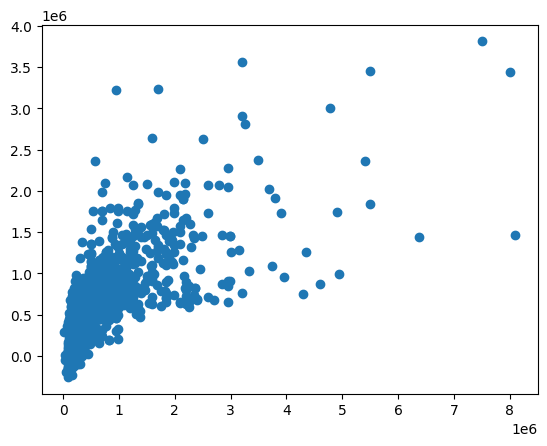

In [120]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

features = ['total property area','state of the building','number of facades','number of bedrooms','Antwerp','Brussels','East Flanders','Flemish Brabant','Walloon Brabant','Hainaut','Limburg','Liège','Luxembourg','Namur','West Flanders','APARTMENT','APARTMENT_BLOCK','BUNGALOW','CASTLE','CHALET','COUNTRY_COTTAGE','DUPLEX','EXCEPTIONAL_PROPERTY','FARMHOUSE','FLAT_STUDIO','GROUND_FLOOR','HOUSE','KOT','LOFT','MANOR_HOUSE','MANSION','MIXED_USE_BUILDING','OTHER_PROPERTY','PENTHOUSE','SERVICE_FLAT','TOWN_HOUSE','TRIPLEX','VILLA','furnished','open fire','terrace','garden','swimming pool']
X = df[features].values
y = df['price'].values

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build neural network model
model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),tf.keras.layers.Dense(32, activation='relu'),tf.keras.layers.Dense(1)])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict using the trained model
y_pred = model.predict(X_test_scaled).flatten()

# Plot prediction accuracy
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

# Model Evaluation
r2_score_value = r2_score(y_test, y_pred)
print("R² score:", r2_score_value)

mse: 379934.3492693755
[0.32176565 0.16970886 0.50102188 0.6386141  0.35677812 0.42088242
 0.47539204 0.3181095  0.40428552 0.58650878]
R² score: 0.506835404302437


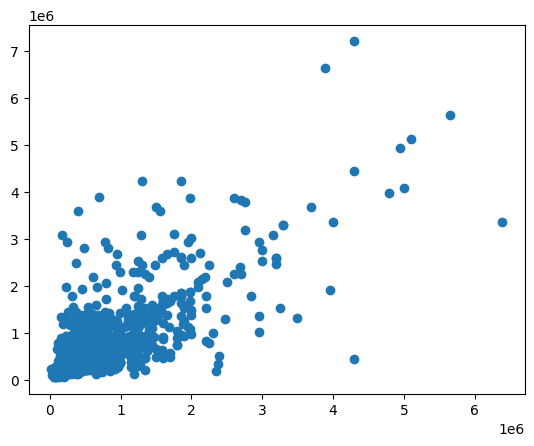

In [173]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(criterion='squared_error',max_depth=100,min_samples_split=5,random_state=5)

features = ['total property area','state of the building','number of facades','number of bedrooms','Antwerp','Brussels','East Flanders','Flemish Brabant','Walloon Brabant','Hainaut','Limburg','Liège','Luxembourg','Namur','West Flanders','APARTMENT','APARTMENT_BLOCK','BUNGALOW','CASTLE','CHALET','COUNTRY_COTTAGE','DUPLEX','EXCEPTIONAL_PROPERTY','FARMHOUSE','FLAT_STUDIO','GROUND_FLOOR','HOUSE','KOT','LOFT','MANOR_HOUSE','MANSION','MIXED_USE_BUILDING','OTHER_PROPERTY','PENTHOUSE','SERVICE_FLAT','TOWN_HOUSE','TRIPLEX','VILLA','furnished','open fire','terrace','garden','swimming pool']
X = df[features].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
print('mse: ' +str(np.sqrt(mean_squared_error(y_test,y_pred))))

from sklearn.model_selection import cross_val_score
print(cross_val_score(regressor,X_train,y_train,cv=10))

# test model
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

r2_score_value = r2_score(y_test, y_pred)
print("R² score:", r2_score_value)

test data ouliers: 262
test data ouliers: 148


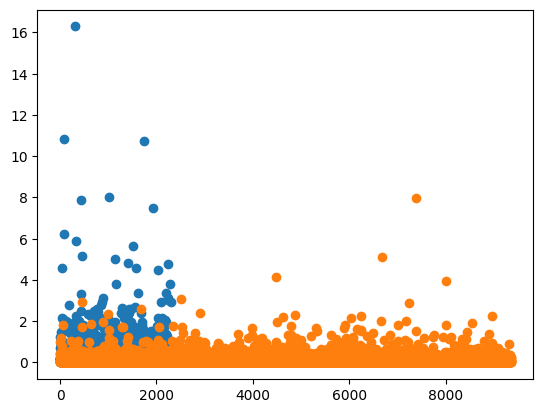

In [177]:
y_error=abs(y_pred-y_test)/y_test
plt.scatter(range(len(y_pred)),y_error)
#y_error=abs(y_pred-y_test)
outliers_pred=0
for i in range(len(y_pred)):
    if y_error[i] > 0.75:
        outliers_pred += 1
print('test data ouliers: '+str(outliers_pred))

# find ouliers in trainingdata
y_pred = regressor.predict(X_train)
y_error=abs(y_pred-y_train)/y_train
plt.scatter(range(len(y_pred)),y_error)
#y_error=abs(y_pred-y_test)
outliers_pred=0
for i in range(len(y_pred)):
    if y_error[i] > 0.75:
        outliers_pred += 1
print('test data ouliers: '+str(outliers_pred))

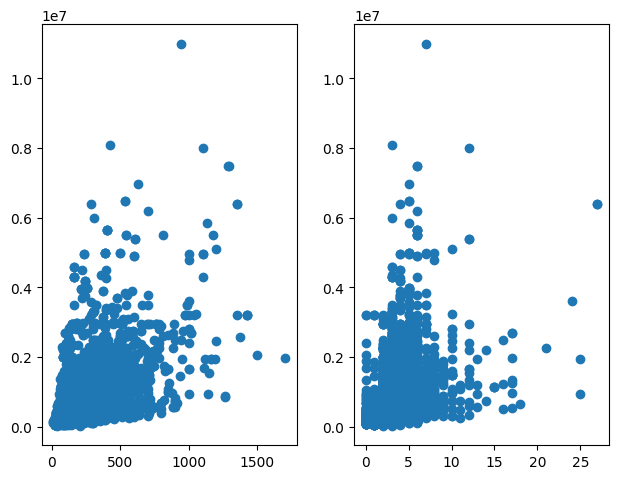

In [169]:
# multi linear plot

fig, axes = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
axes[0].scatter(df['total property area'],df['price'])
axes[1].scatter(df['number of bedrooms'],df['price'])
plt.show()

ValueError: x and y must be the same size

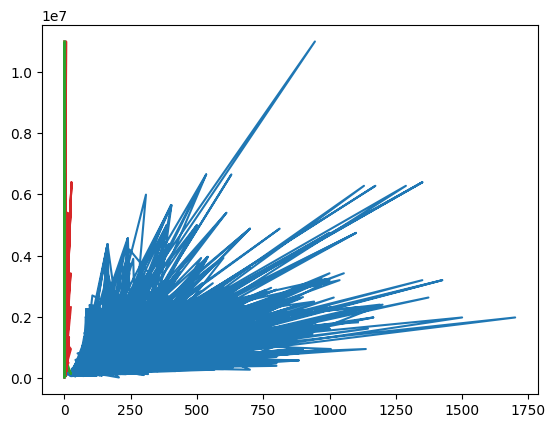

In [166]:
plt.plot(X_train, regressor.predict(X_train))
plt.scatter(X_train,y_train, color = 'red')
plt.title('price vs area (Training set)')
plt.xlabel('total property area')
plt.ylabel('price')
plt.show()